In [ ]:
# default_exp dataset

In [ ]:
%load_ext autoreload
%autoreload 2

# Dataset

> This files holds functions to create a plant pathology dataset.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
from fastai.vision.all import *
from plant_pathology.utils import *
from typing import *

## Building DataBlock

In [ ]:
#export
def get_datablock(path: Path, df: pd.DataFrame, presize: int, 
                  resize: int, val_fold: int=4) -> DataBlock:
    def get_y(row): return df.columns[row==1][0]
    return DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_x=ColReader("image_id", pref=path/'images', suff=".jpg"),
                get_y=get_y,
                splitter=MaskSplitter(df["fold"]==val_fold),
                item_tfms=Resize(presize),
                batch_tfms=aug_transforms(mult=1.5, max_rotate=22.5, min_zoom=0.9,
                                         size=resize, min_scale=0.5, flip_vert=True,
                                         max_zoom=1.2))

### Experimenting with Different Augmentations

In [ ]:
path, df = load_data()

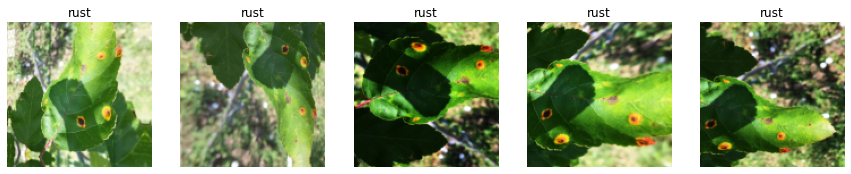

In [ ]:
data = get_datablock(path, df, 256, 128)
dls = data.dataloaders(df)
dls.show_batch(unique=True, max_n=5, nrows=1)

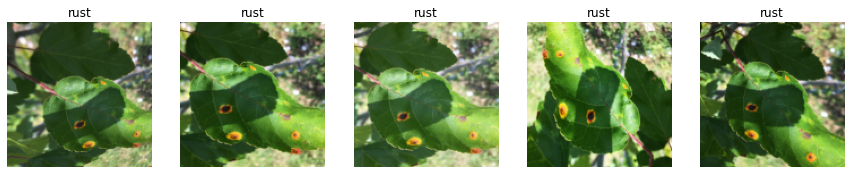

In [ ]:
dls = data.new(item_tfms=Resize(256), 
               batch_tfms=aug_transforms(size=128, min_scale=0.3, flip_vert=True,
                                        max_rotate=45.)).dataloaders(df)
dls.show_batch(unique=True, max_n=5, nrows=1)

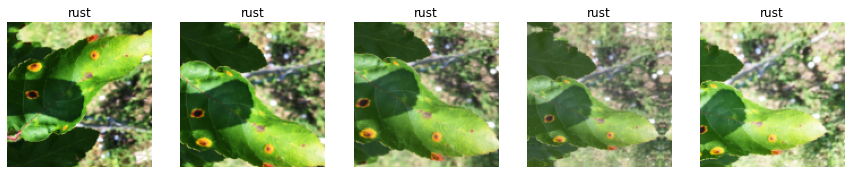

In [ ]:
dls = data.new(item_tfms=Resize(256), 
               batch_tfms=aug_transforms(mult=1.5, max_rotate=22.5, min_zoom=0.9,
                                         size=128, min_scale=0.5, flip_vert=True,
                                         max_zoom=1.2)
              ).dataloaders(df)
dls.show_batch(unique=True, max_n=5, nrows=1)

## Building DataLoaders

In [ ]:
#export
def get_dls(path: Path, df: pd.DataFrame, presize: Union[tuple, int]=(682, 1024), 
            resize: int=256, bs: int=256, val_fold: int=4) -> DataLoaders:
    return get_datablock(path, df, presize, resize, val_fold).dataloaders(df, bs=bs)

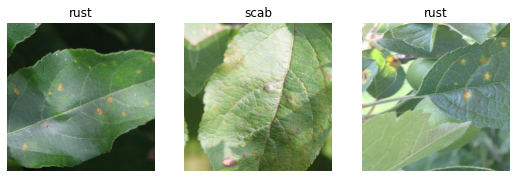

In [ ]:
dls = get_dls(path, df, bs=3)
dls.show_batch()

## All-in-One Function to Load DataLoaders

In [ ]:
#export
@delegates(get_dls)
def get_dls_all_in_1(pseudo: str=None, **kwargs) -> DataLoaders:
    path, df = load_data(path_pseudo_labels=pseudo)
    return get_dls(path, df, **kwargs)

In [ ]:
dls = get_dls_all_in_1(val_fold=-1)

In [ ]:
test_eq(len(dls.valid), 0)

### Picking Presize and Resize

In [ ]:
files = get_image_files(path); files

(#3642) [Path('/home/brandon/projects/plant_pathology/data/images/Train_719.jpg'),Path('/home/brandon/projects/plant_pathology/data/images/Test_717.jpg'),Path('/home/brandon/projects/plant_pathology/data/images/Train_544.jpg'),Path('/home/brandon/projects/plant_pathology/data/images/Train_758.jpg'),Path('/home/brandon/projects/plant_pathology/data/images/Test_1697.jpg'),Path('/home/brandon/projects/plant_pathology/data/images/Train_468.jpg'),Path('/home/brandon/projects/plant_pathology/data/images/Train_1535.jpg'),Path('/home/brandon/projects/plant_pathology/data/images/Test_1459.jpg'),Path('/home/brandon/projects/plant_pathology/data/images/Test_625.jpg'),Path('/home/brandon/projects/plant_pathology/data/images/Test_1321.jpg')...]

In [ ]:
imgs = L(PILImage.create(f) for f in files[:30])
imgs.map(Self.size())

(#30) [(2048, 1365),(2048, 1365),(2048, 1365),(2048, 1365),(2048, 1365),(2048, 1365),(2048, 1365),(2048, 1365),(2048, 1365),(2048, 1365)...]

Looks like all the images have the same size.

In [ ]:
sz = (2048, 1365)
def divide_tuple(div): return sz[0]//div, sz[1]//div

In [ ]:
divide_tuple(2)

(1024, 682)

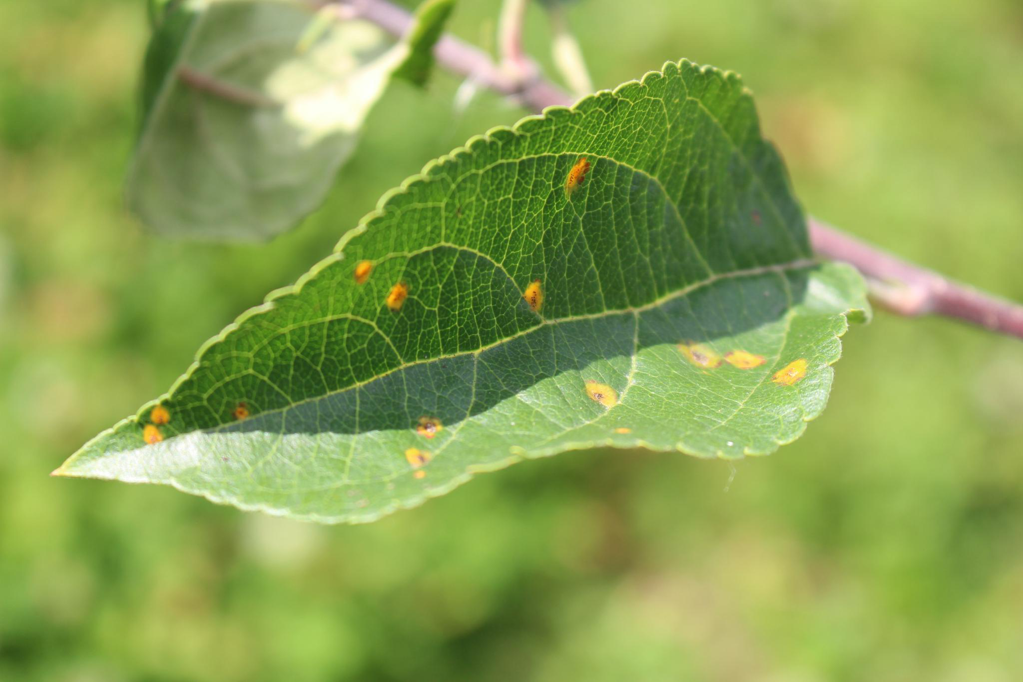

In [ ]:
imgs[0].to_thumb(682, 1024)

In [ ]:
dls = get_dls_all_in_1(presize=(682, 1024), resize=256, bs=3)
len(dls.train), len(dls.valid)

(485, 122)

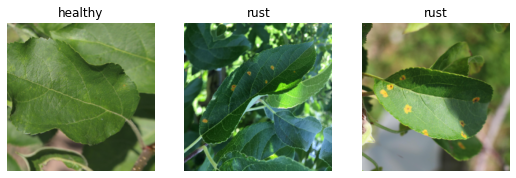

In [ ]:
dls.show_batch()

In [ ]:
#hide
from nbdev.export import *
notebook2script()

Converted 00_utils.ipynb.
Converted 01_dataset.ipynb.
Converted 02_evaluate.ipynb.
Converted 03_train.ipynb.
Converted 04_generate_pseudo_labels.ipynb.
Converted 05_self_knowledge_distillation.ipynb.
Converted index.ipynb.
